In [1]:
import os
print("sample.fasta exists?", os.path.exists("fasta-files/sample.fasta"))


sample.fasta exists? True


In [2]:
from Bio import SeqIO

for record in SeqIO.parse("fasta-files/sample.fasta", "fasta"):
    print("🧬 ID:", record.id)
    print("Description:", record.description)
    print("Sequence:", record.seq)
    print("Length:", len(record.seq))
    print("-" * 40)


🧬 ID: geneA
Description: geneA Homo sapiens mitochondrial
Sequence: ATGCGTACGTAGCTAGCTAGCTAGCGT
Length: 27
----------------------------------------
🧬 ID: geneB
Description: geneB Mus musculus nuclear
Sequence: ATGCGTAGCTAGCTGATCGTAGCTAGC
Length: 27
----------------------------------------
🧬 ID: geneC
Description: geneC Saccharomyces_cerevisiae enzyme
Sequence: ATGGCTAGCTAGCGTAGCATCGATGCA
Length: 27
----------------------------------------
🧬 ID: geneD
Description: geneD hypothetical_protein
Sequence: ATGAAATTTGGGCCCTTTAAAGGCCAA
Length: 27
----------------------------------------


In [3]:
from Bio.SeqUtils import gc_fraction

fasta_file = "fasta-files/sample.fasta"

for record in SeqIO.parse(fasta_file, "fasta"):
    seq = record.seq
    gc_percent = gc_fraction(seq) * 100          # fraction → percentage
    print(f"{record.id} → Length: {len(seq)}, GC%: {gc_percent:.2f}")


geneA → Length: 27, GC%: 51.85
geneB → Length: 27, GC%: 51.85
geneC → Length: 27, GC%: 51.85
geneD → Length: 27, GC%: 40.74


In [4]:
import pandas as pd

data = []

for record in SeqIO.parse("fasta-files/sample.fasta", "fasta"):
    seq = record.seq
    gc_percent = gc_fraction(seq) * 100
    data.append({
        "Gene_ID": record.id,
        "Description": record.description,
        "Length_bp": len(seq),
        "GC_Content(%)": round(gc_percent, 2)
    })

df = pd.DataFrame(data)
df.to_csv("fasta-files/fasta_summary.csv", index=False)
print("✅ Results saved to fasta_summary.csv")
df


✅ Results saved to fasta_summary.csv


,Gene_ID,Description,Length_bp,GC_Content(%)
0,geneA,geneA Homo sapiens mitochondrial,27,51.85
1,geneB,geneB Mus musculus nuclear,27,51.85
2,geneC,geneC Saccharomyces_cerevisiae enzyme,27,51.85
3,geneD,geneD hypothetical_protein,27,40.74


In [5]:
from Bio.SeqUtils import gc_fraction

data = []

for record in SeqIO.parse("fasta-files/sample.fasta", "fasta"):
    seq = record.seq
    gc_percent = gc_fraction(seq) * 100
    data.append({
        "Gene_ID": record.id,
        "Description": record.description,
        "Length_bp": len(seq),
        "GC_Content(%)": round(gc_percent, 2)
    })

df = pd.DataFrame(data)
df.to_csv("fasta-files/fasta_summary.csv", index=False)
print("✅ Results saved to fasta_summary.csv")
df


✅ Results saved to fasta_summary.csv


,Gene_ID,Description,Length_bp,GC_Content(%)
0,geneA,geneA Homo sapiens mitochondrial,27,51.85
1,geneB,geneB Mus musculus nuclear,27,51.85
2,geneC,geneC Saccharomyces_cerevisiae enzyme,27,51.85
3,geneD,geneD hypothetical_protein,27,40.74


In [6]:
import pandas as pd

# Load the CSV generated on Day 2
df = pd.read_csv("fasta-files/fasta_summary.csv")

# Display first few rows
df.head()


,Gene_ID,Description,Length_bp,GC_Content(%)
0,geneA,geneA Homo sapiens mitochondrial,27,51.85
1,geneB,geneB Mus musculus nuclear,27,51.85
2,geneC,geneC Saccharomyces_cerevisiae enzyme,27,51.85
3,geneD,geneD hypothetical_protein,27,40.74


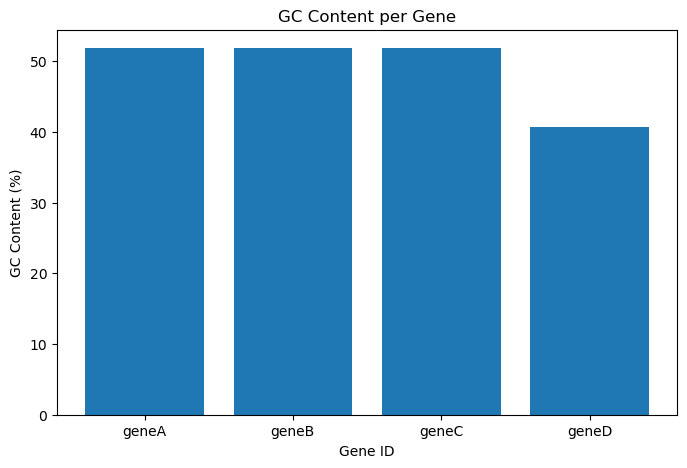

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(df["Gene_ID"], df["GC_Content(%)"])
plt.title("GC Content per Gene")
plt.xlabel("Gene ID")
plt.ylabel("GC Content (%)")
plt.show()


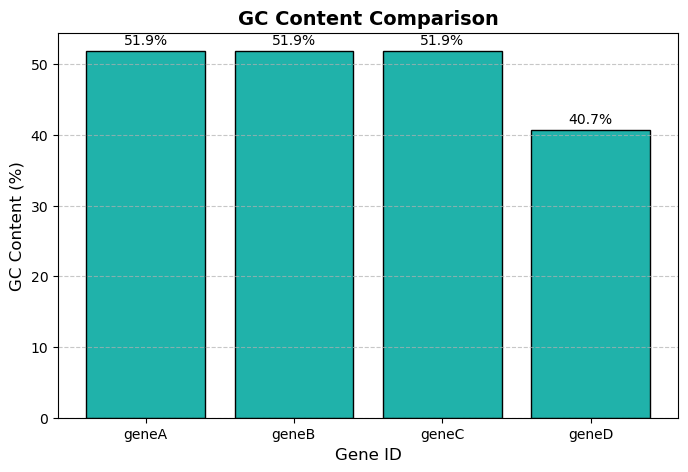

In [8]:
plt.figure(figsize=(8,5))
bars = plt.bar(df["Gene_ID"], df["GC_Content(%)"], color='lightseagreen', edgecolor='black')
plt.title("GC Content Comparison", fontsize=14, fontweight='bold')
plt.xlabel("Gene ID", fontsize=12)
plt.ylabel("GC Content (%)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}%', 
             ha='center', va='bottom', fontsize=10)

plt.show()


In [9]:
plt.savefig("visual-outputs/gc_content_plot.png", dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [10]:
import hashlib

with open("fasta-files/fasta_summary.csv", "rb") as file:
    data = file.read()
    data_hash = hashlib.sha256(data).hexdigest()

print("🔐 Data Hash (SHA-256):", data_hash)


🔐 Data Hash (SHA-256): 1dfbc7719fed953c43ff287f7d0f4fc1b2ee6de3a515973cbd37b80037363cfc
